<div style="text-align: justify;">

The total precedure is


1.   preprocess text
2.   change the text into proper vectors 
3.   create a model and train on that model

the operations done for the preprocessing is to eliminate punctuations, stopwords, emojies, english characters, links, html tags. Then the text is ready to be stemmed and lemmetized. 
for the preprocessing **Hazm** library is used. 

to change the text into vectors two options are out there, I have used both of them. first **word2vec** second **bag of words**. I have used both of them and used different models to train and test the data. the best model was SVM  model on word2vec embedding with 70% accuracy on test data. others had almost 69% accuracy on the test data.



In [ ]:
# !pip install fasttext

In [ ]:
!pip install hazm

     |████████████████████████████████| 317kB 11.6MB/s 
     |████████████████████████████████| 1.4MB 27.0MB/s 
     |████████████████████████████████| 235kB 36.9MB/s 
  Created wheel for nltk: filename=nltk-3.3-cp37-none-any.whl size=1394488 sha256=4c58a65876bee1e0350666b9709fd57c20f7f429e77e168f35c18aceb036f303
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154012 sha256=bd4e0e3e775f6e0052c8ab6627b9109dea5e10005ee7259122beadd42b3b87bc
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
Successfully built nltk libwapiti
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.svm import SVC as SVM
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #for train and test split

<h2>Download Data</h2>

In [ ]:
# downloading data from the links and extract the data in the current directory


import requests

url = 'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1oRaIYZyKiBHQwvtsQ4iUilJ4av3w6jNW'
r = requests.get(url, allow_redirects=True)
open('train.zip', 'wb').write(r.content)
from zipfile import ZipFile
with ZipFile("train.zip", 'r') as zip:
  zip.extractall()

url = 'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1DaAlllST8W7oKzwTwN1ov7CPRPeiKC1T'
r = requests.get(url, allow_redirects=True)
open('test.zip', 'wb').write(r.content)
from zipfile import ZipFile
with ZipFile("test.zip", 'r') as zip:
  zip.extractall()

<h2>Functions for preprocessing and preprocessing</h2>

***Removal of URLs***

Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

***Removal of HTML Tags***

One another common preprocessing technique that will come handy in multiple places is removal of html tags. This is especially useful, if we scrap the data from different websites. We might end up having html strings as part of our text.

In [ ]:
#function for removing html tags and links

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  cleantext = re.sub(cleanr, ' ', raw_html)
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', cleantext, flags=re.MULTILINE)
  return text
  # https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

***Removal of Emojis***

With more and more usage of social media platforms, there is an explosion in the usage of emojis in our day to day life as well. Probably we might need to remove these emojis for some of our textual analysis.

In [ ]:
# function for removing emojis

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

***Stemming***

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.

For example, if there are two words in the corpus walks and walking, then stemming will stem the suffix to make them walk. But say in another example, we have two words console and consoling, the stemmer will remove the suffix and make them consol which is not a proper english word.

***Lemmatization***

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

In [ ]:
# importing re and hazm for preprocessing

import re
from hazm import *

normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

***Removal of stopwords***

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

In [ ]:
# downlaoding persian stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import WordListCorpusReader
stopwords = WordListCorpusReader('', "hazm/data/stopwords.dat", encoding='utf8')
STOPWORDS = stopwords_list()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***Removal of Punctuations***

One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

In [ ]:
#downloading punctuations

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# saving farsi numbers
numbers = ['۰', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹']

<h2> Reading the data </h2>

In [ ]:
data = pd.read_csv("train_set.csv")

In [ ]:
data_test = pd.read_csv("test_set.csv")

In [ ]:
# first glanse at data
data

,app_id,description_fa,label
0,0,<p>بازی مین روب یک برنامه فکری است که باید مین...,1
1,1,<p>دراین بازی تعدادی عکس برای شما نشان داده می...,1
2,2,<br>تلاش نافرجام برای درک «بوفالو»<br>مرگ پایا...,7
3,3,<p>فیلم نما ، برنامه ای برای دانلود و پخش آنلا...,7
4,4,<p>* این برنامه حاوی بیش از 500 عکس و ژست برای...,7
...,...,...,...
37894,37894,<h3>بدون هیچ هزینه ای، هر هفته مسابقه</h3>\n<p...,1
37895,37895,<p>حیوانات مزرعه به کمک شما احتیاج دارند. بلوک...,1
37896,37896,<p><b>_ دوست داری عکس پروفایلت خاص باشه؟</b></...,7
37897,37897,<p> <p> <b>@@ اولین نسخه این بازی @@ </b> <br>...,1


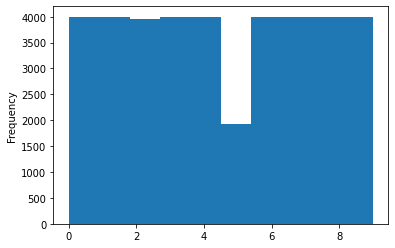

In [ ]:
# see the histogram of the labels

data["label"].plot.hist(bins = 10)

<h2> Preprocess the data </h2>

In [ ]:
def preprocess_data(data):
  for i in range(0, len(data["description_fa"])):
    x = data["description_fa"][i] 
    document = cleanhtml(x)
    document = deEmojify(document)
    document = re.sub(r'[A-Z0-9a-z]+'," ",document)
    regex = re.compile(r'[\n\r\t]')
    document = regex.sub(" ",  document)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # remove more than one space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # remove single words
    document = re.sub(r'\b\w{1}\b', '', document)
    text = ' '.join(word for word in word_tokenize(document) if word not in STOPWORDS)
    #text= ' '.join(word for word in word_tokenize(text) if word.isalnum())
    for n in numbers:
      text = text.replace(n," ")

    # normalize
    d_n = normalizer.normalize(text)
    res = re.sub(r'[^\w\s]', '', d_n)
    new_corpus=' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(res)])
    new_corpus=new_corpus.replace("#", ' ')
    new_corpus=[' '.join([stemmer.stem(word) for word in word_tokenize(new_corpus)])]
    data["description_fa"][i] = new_corpus[0]

  return data

In [ ]:
data = preprocess_data(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# train data after preprocessing
data

,app_id,description_fa,label
0,0,بازی مین روب برنامه فکر مین موجود صفحه بازی کش...,1
1,1,دراین بازی تعداد عکس نشان خاطر سپرده بعدا جواب...,1
2,2,تلاش نافرجام درک بوفالو مرگ پایان ماجرا آنجاست...,7
3,3,فیلم نما برنامهای دانلود آنلاین فیلم سریال نما...,7
4,4,برنامه حاوی عکس ژست مدل عکاس شدنه کتاب مدلهای ...,7
...,...,...,...
37894,37894,هزینهای هفته مسابقه هرگونه ابهام سوال مشکل کان...,1
37895,37895,حیوانات مزرعه کمک احتیاج بلوک نجات ببرید جذاب ...,1
37896,37896,دوست داشت دار عکس پروفایلت باشه حتما برنامه نص...,7
37897,37897,نسخه بازی بازی معما صد لوگوی باشگاه جهان دید ب...,1


In [ ]:
data_test = preprocess_data(data_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# test data after processing

data_test["description_fa"]

0       برنامه باز جالب میکرو آماده باز جنگ بالون باز ...
1       باز آموز میلونر زب انگلیس تقو زب انگیلیس سنین ...
2       موضوع بین کل کرد کن شاد سرگر حدس کل موضوع سبک ...
3       نر افزار فول تلگرا تلگرا امک بهتون ده هیچ نر ا...
4       کرد کن سریع هست تون خودتو امتح کرد کن باز ساده...
                              ...                        
9995    فالوورگیر اینستاگرا امک لایک گرف گیر اینستاگرا...
9996    میخوا نامحدود آنفلو کرد کن دلتون میخواد عکس ای...
9997    باز زیبا کنسول میکرو یاد گذشته براتون بازیه زی...
9998    دوس دا دار اطلاع عمو بالا دا دار دوس دا دار چ ...
9999    لباس ت فوتبالو میشناس دل میخواد خودتو محک زد ز...
Name: description_fa, Length: 10000, dtype: object

In [ ]:
# create y from the data for furthur processes

y = data["label"]
y = y.to_numpy()

<h1> <b>Process the Data</b> </h1>

<h2> Bag of words </h2>

In [ ]:
#for impementing bag of words

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data["description_fa"], y)

In [ ]:
#create bag of words on the whole data

matrix = CountVectorizer(max_features=1500, lowercase="false")
x_train = matrix.fit_transform(data["description_fa"]).toarray()

In [ ]:
# create bag of words on just a data splitedt for training

matrix_2 = CountVectorizer(max_features=1500, lowercase="false")
X_train_2 = matrix_2.fit_transform(X_train).toarray()

In [ ]:
# create bag of words on the validation data

x_test = matrix_2.transform(X_test).toarray()

In [ ]:
# create bag of words on the whole test data

x_test = matrix.transform(data_test["description_fa"]).toarray()

In [ ]:
# show the words and the vectors by the bag of words
results = pd.DataFrame(x_train, columns=matrix.get_feature_names())
results

,آب,آت,آتار,آثار,آخر,آد,آدرس,آرا,آرام,آرزو,آزاد,آزما,آزمون,آس,آشنا,آشپز,آغاز,آفلاین,آقا,آل,آماده,آمار,آمد,آمریکا,آموخ,آموز,آمیز,آن,آندروید,آنرا,آنفالو,آنلاین,آهنگ,آور,آورد,آوردن,آپ,آپد,آپدیت,آگاه,...,گرامر,گربه,گرد,گردآور,گردیده,گرف,گرفتن,گروه,گزار,گزینه,گف,گفتگو,گل,گلچین,گنجانده,گو,گوشی,گوشیتون,گوناگون,گوگل,گیاه,گیر,گیف,گیمر,گیمپل,یا,یاب,یاد,یادآور,یادتون,یاددا,یادگیر,یار,یاف,یافتن,یخ,یه,یک,یکبار,یکس
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37894,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37895,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
37897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2>Training the data</h2>

In [ ]:
# create svm for training (it takes almost 30 minutes)
from sklearn.svm import SVC as SVM
clf = SVM()
clf.fit(x_train,y_train.astype("int"))
print("testing")
pred = clf.predict(x_test)

testing


In [ ]:
# Saving our model
import pickle
loaded_model = pickle.load(open("svm.sav", 'rb'))
pickle.dump(clf, open("svm1.sav", 'wb'))

In [ ]:
# calculate accuracy on validation data
acc = 0
for i in range(0, len(y_test)):
  if pred[i] == y_test[i]:
    acc = acc + 1
(acc/len(y_test))*100

69.2137203166227

In [ ]:
# predictions = loaded_model.predict(x_real_test)

In [ ]:
# adding data to our dataframe
data_test["label"] = predictions 

<h2> <b>word2vec</b> </h2>

In [ ]:
# tokenize whole data(test and train) to give them to word2vec model

xx_vw = [] #each row is a sentence with its words are tokenized for train data
for i in range(0, len(data["description_fa"])):
  xx_vw.append(word_tokenize(data["description_fa"][i]))


xx_vw_test = [] #each row is a sentence with its words are tokenized for test data
for i in range(0, len(data_test["description_fa"])):
  xx_vw_test.append(word_tokenize(data_test["description_fa"][i]))

In [ ]:
# create and train word2vec model
from gensim.models import Word2Vec
mod = Word2Vec(sentences=xx_vw, window=5, min_count=1, workers=4)
model_vw = mod.train(sentences= xx_vw, epochs=50, total_examples=len(xx_vw))

In [ ]:
# create a list to save the vocabulary vectors to show with tsne
X = []
for i in mod.wv.vocab:
  X.append(mod[i])
X = np.array(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# create a list to save the vocabulary
words = []
for i in mod.wv.vocab:
  words.append(i)

In [ ]:
# reducing data dimension

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [ ]:
# show the new data in pandas dataframe
df = pd.DataFrame(X_tsne, index=words, columns=['x', 'y'])
df

,x,y
باز,-32.918629,-6.749569
مین,-16.716297,41.199577
روب,29.499065,-30.494104
برنامه,-10.763282,-41.825706
فکر,-22.879459,27.505150
...,...,...
دریدن,20.114393,-38.879700
حقیقتند,-16.736403,2.056716
کردنشین,6.888130,4.533368
گریختگ,-8.214622,-9.022532


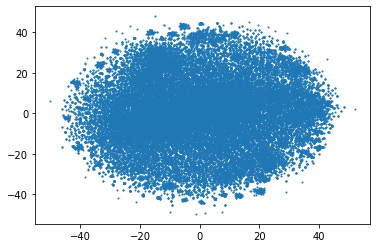

In [ ]:
# showing vectors of word2vec
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], s=1)

In [ ]:
# create vector of each row of data! by summing the vector of each word in that row

final_x_wv = [] #contatining the vectors of each rows of train data
for i in range(0, len(data["description_fa"])):
  v = np.zeros((100, 1))
  for j in range(0, len(xx_vw[i])): 
    v = v + mod.wv.get_vector(xx_vw[i][j]).reshape((100, 1)) 

  t = np.array(v)
  t = t.astype("float64") 
  final_x_wv.append(t)

Next cell is for LSTM netgwork. it tokenizes each data in the dataset so we can have a matrix contating datas that i each data we have the vectors of its containing words.

In [ ]:
# create vector of each row of data with words tokenized

word_x_wv_numeric = [] #contatining the vectors of each rows of train data with words tokenized
for i in range(0, len(xx_vw)):
  tmp = []
  for j in range(0, len(xx_vw[i])):
    tmp.append(mod.wv.get_vector(xx_vw[i][j]).reshape((100, 1)))

  word_x_wv_numeric.append(tmp)

In [ ]:
v = np.zeros((100, 1)) # zero vector
final_word_x_wv_numeric = []
for i in range(0, len(word_x_wv_numeric)):
  if len(word_x_wv_numeric[i]) < 50:
    for j in range(0, 50 - len(word_x_wv_numeric[i])):
      word_x_wv_numeric[i].append(v)
    t = np.array(word_x_wv_numeric[i])
    final_word_x_wv_numeric.append(t)

  elif len(word_x_wv_numeric[i]) >= 50:
      tmp = np.array(word_x_wv_numeric[i])[:50, :, :]
      final_word_x_wv_numeric.append(tmp)

In [ ]:
final_word_x_wv_numeric= np.squeeze(final_word_x_wv_numeric , axis=3) #removing axis=3 which is 1

In [ ]:
# change final_x_wv to numpy array
final_x_wv = np.array(final_x_wv)

In [ ]:
# squeeze the last dimension which is euqal to one

final_x_wv  = np.squeeze(final_x_wv , axis=2)
final_x_wv.shape

(37899, 100)

Reducing the sentences dimension and plot them with labels in matplotlib

In [ ]:
# squeez data for tsne and for neural network, removing axis=2 which is equal to one

# final_x_wv  = np.squeeze(final_x_wv , axis=2)
# final_x_wv.shape

In [ ]:
# dimension reduction for train data

tsne_wv = TSNE(n_components=2)
X_tsne_wv = tsne_wv.fit_transform(final_x_wv)

In [ ]:
#create a dataframe for dimensions
df_wv = pd.DataFrame(X_tsne_wv, columns=['x', 'y'])
df_wv["label"] = data["label"]
df_wv

,x,y,label
0,5.613850,-44.509953,1
1,17.060585,-3.830742,1
2,33.380016,2.276319,7
3,-20.600708,31.650822,7
4,-23.747295,13.741567,7
...,...,...,...
37894,9.713128,-50.378559,1
37895,-2.947710,-10.976546,1
37896,-27.692030,13.045506,7
37897,21.728626,-13.117060,1


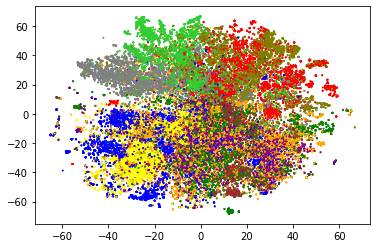

In [ ]:
# ploting the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green','blue','purple','yellow','brown','orange','grey','olive', 'limegreen']
ax.scatter(df_wv['x'], df_wv['y'], s=1, c=df_wv["label"], cmap=matplotlib.colors.ListedColormap(colors))

Creating the vector for the test data

In [ ]:
# create vector of each row of the test data! by summing the vector of each word in that row

final_x_wv_test = [] #contatining the vectors of each rows of test data
for i in range(0, len(data_test["description_fa"])):
  v = np.zeros((100, 1))
  for j in range(0, len(xx_vw_test[i])): 
    if xx_vw_test[i][j] in mod.wv.vocab:
      v = v + mod.wv.get_vector(xx_vw_test[i][j]).reshape((100, 1)) 

  t = np.array(v)
  t = t.astype("float64") 
  final_x_wv_test.append(t)

In [ ]:
# create vector of each row of data with words tokenized on test data

word_x_wv_numeric_test = [] #contatining the vectors of each rows of train data with words tokenized
for i in range(0, len(xx_vw_test)):
  tmp = []
  for j in range(0, len(xx_vw_test[i])):
    if xx_vw_test[i][j] in mod.wv.vocab:
      tmp.append(mod.wv.get_vector(xx_vw_test[i][j]).reshape((100, 1)))

  word_x_wv_numeric_test.append(tmp)

In [ ]:
v = np.zeros((100, 1))
final_word_x_wv_numeric_test = []
for i in range(0, len(word_x_wv_numeric_test)):
  if len(word_x_wv_numeric_test[i]) < 50:
    for j in range(0, 50 - len(word_x_wv_numeric_test[i])):
      word_x_wv_numeric_test[i].append(v)
    t = np.array(word_x_wv_numeric_test[i])
    final_word_x_wv_numeric_test.append(t)

  elif len(word_x_wv_numeric_test[i]) >= 50:
      tmp = np.array(word_x_wv_numeric_test[i])[:50, :, :]
      final_word_x_wv_numeric_test.append(tmp)

In [ ]:
final_word_x_wv_numeric_test = np.array(final_word_x_wv_numeric_test) 

In [ ]:
final_word_x_wv_numeric_test = np.squeeze(final_word_x_wv_numeric_test, axis=3)

In [ ]:
# squeez data for tsne and for neural network, removing axis=2 which is equal to one

final_x_wv_test  = np.squeeze(final_x_wv_test , axis=2)
final_x_wv_test.shape

(10000, 100)

In [ ]:
# dimension reduction

tsne_wv_test = TSNE(n_components=2)
X_tsne_wv_test = tsne_wv.fit_transform(final_x_wv_test)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>Logistic Rgression</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=2000)
classifier.fit(final_x_wv,y_train.astype("int"))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
p = classifier.predict(final_x_wv_test)

-------------------------------------------------

<h2><b>LSTM</b></h2>

pytorch version


---



In [ ]:
# for pytorch version

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


class LSTMClassifier(nn.Module):

	def __init__(self, vocab_size, embedding_dim, hidden_dim, output_size):

		super(LSTMClassifier, self).__init__()

		self.embedding_dim = embedding_dim
		self.hidden_dim = hidden_dim
		self.vocab_size = vocab_size

		self.embedding = nn.Embedding(vocab_size, embedding_dim)
		self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=1)

		self.hidden2out = nn.Linear(hidden_dim, output_size)
		self.softmax = nn.LogSoftmax()

		self.dropout_layer = nn.Dropout(p=0.2)


	def init_hidden(self, batch_size):
		return(autograd.Variable(torch.randn(1, batch_size, self.hidden_dim)),
						autograd.Variable(torch.randn(1, batch_size, self.hidden_dim)))


	def forward(self, batch, lengths):
		
		self.hidden = self.init_hidden(batch.size(-1))

		embeds = self.embedding(batch)
		packed_input = pack_padded_sequence(embeds, lengths)
		outputs, (ht, ct) = self.lstm(packed_input, self.hidden)

		# ht is the last hidden state of the sequences
		# ht = (1 x batch_size x hidden_dim)
		# ht[-1] = (batch_size x hidden_dim)
		output = self.dropout_layer(ht[-1])
		output = self.hidden2out(output)
		output = self.softmax(output)

		return output

In [ ]:
import os
import sys
import argparse
import time
import random
import utils
import pdb

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from data import PaddedTensorDataset
from data import TextLoader
from model import LSTMClassifier


def main():
	parser = argparse.ArgumentParser()
	parser.add_argument('--data_dir', type=str, default='toy_data/names',
											help='data_directory')
	parser.add_argument('--hidden_dim', type=int, default=32,
											help='LSTM hidden dimensions')
	parser.add_argument('--batch_size', type=int, default=32,
											help='size for each minibatch')
	parser.add_argument('--num_epochs', type=int, default=5,
											help='maximum number of epochs')
	parser.add_argument('--char_dim', type=int, default=128,
											help='character embedding dimensions')
	parser.add_argument('--learning_rate', type=float, default=0.01,
											help='initial learning rate')
	parser.add_argument('--weight_decay', type=float, default=1e-4,
											help='weight_decay rate')
	parser.add_argument('--seed', type=int, default=123,
											help='seed for random initialisation')
	args = parser.parse_args()
	train(args)


def apply(model, criterion, batch, targets, lengths):
    pred = model(torch.autograd.Variable(batch), lengths.cpu().numpy())
    loss = criterion(pred, torch.autograd.Variable(targets))
    return pred, loss


def train_model(model, optimizer, train, dev, x_to_ix, y_to_ix, batch_size, max_epochs):
    criterion = nn.NLLLoss(size_average=False)
    for epoch in range(max_epochs):
        print('Epoch:', epoch)
        y_true = list()
        y_pred = list()
        total_loss = 0
        for batch, targets, lengths, raw_data in utils.create_dataset(train, x_to_ix, y_to_ix, batch_size=batch_size):
            batch, targets, lengths = utils.sort_batch(batch, targets, lengths)
            model.zero_grad()
            pred, loss = apply(model, criterion, batch, targets, lengths)
            loss.backward()
            optimizer.step()
            
            pred_idx = torch.max(pred, 1)[1]
            y_true += list(targets.int())
            y_pred += list(pred_idx.data.int())
            total_loss += loss
        acc = accuracy_score(y_true, y_pred)
        val_loss, val_acc = evaluate_validation_set(model, dev, x_to_ix, y_to_ix, criterion)
        print("Train loss: {} - acc: {} \nValidation loss: {} - acc: {}".format(total_loss.data.float()/len(train), acc,
                                                                                val_loss, val_acc))
    return model


def evaluate_validation_set(model, devset, x_to_ix, y_to_ix, criterion):
    y_true = list()
    y_pred = list()
    total_loss = 0
    for batch, targets, lengths, raw_data in utils.create_dataset(devset, x_to_ix, y_to_ix, batch_size=1):
        batch, targets, lengths = utils.sort_batch(batch, targets, lengths)
        pred, loss = apply(model, criterion, batch, targets, lengths)
        pred_idx = torch.max(pred, 1)[1]
        y_true += list(targets.int())
        y_pred += list(pred_idx.data.int())
        total_loss += loss
    acc = accuracy_score(y_true, y_pred)
    return total_loss.data.float()/len(devset), acc


def evaluate_test_set(model, test, x_to_ix, y_to_ix):
    y_true = list()
    y_pred = list()

    for batch, targets, lengths, raw_data in utils.create_dataset(test, x_to_ix, y_to_ix, batch_size=1):
        batch, targets, lengths = utils.sort_batch(batch, targets, lengths)

        pred = model(torch.autograd.Variable(batch), lengths.cpu().numpy())
        pred_idx = torch.max(pred, 1)[1]
        y_true += list(targets.int())
        y_pred += list(pred_idx.data.int())

    print(len(y_true), len(y_pred))
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))


def train(args):

	random.seed(args.seed)
	data_loader = TextLoader(args.data_dir)

	train_data = data_loader.train_data
	dev_data = data_loader.dev_data
	test_data = data_loader.test_data

	char_vocab = data_loader.token2id
	tag_vocab = data_loader.tag2id
	char_vocab_size = len(char_vocab)

	print('Training samples:', len(train_data))
	print('Valid samples:', len(dev_data))
	print('Test samples:', len(test_data))

	print(char_vocab)
	print(tag_vocab)

	model = LSTMClassifier(char_vocab_size, args.char_dim, args.hidden_dim, len(tag_vocab))
	optimizer = optim.SGD(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)

	model = train_model(model, optimizer, train_data, dev_data, char_vocab, tag_vocab, args.batch_size, args.num_epochs)

	evaluate_test_set(model, test_data, char_vocab, tag_vocab)



keras version


---



In [ ]:
import numpy as np
import pandas as pd
import gensim
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import *
from keras.layers import *
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
num_classes = np.max(y) + 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_word_x_wv_numeric,y.astype("int"))

In [ ]:
x_train = sequence.pad_sequences(X_train, maxlen=max_len)
x_test = sequence.pad_sequences(X_test, maxlen=max_len)

In [ ]:
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:

model = Sequential()
model.add(SpatialDropout1D(0.2))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 1

history = model.fit(X_train, y_train, epochs=epochs, batch_size=1,validation_data=(X_test, y_test))

Epoch 1/5
28424/28424 [==============================] - 801s 28ms/step - loss: 1.6134 - accuracy: 0.3949 - val_loss: 1.1084 - val_accuracy: 0.6076
Epoch 2/5
28424/28424 [==============================] - 794s 28ms/step - loss: 1.1525 - accuracy: 0.5903 - val_loss: 1.0034 - val_accuracy: 0.6425
Epoch 3/5
28424/28424 [==============================] - 798s 28ms/step - loss: 1.0614 - accuracy: 0.6193 - val_loss: 0.9840 - val_accuracy: 0.6504
Epoch 4/5
28424/28424 [==============================] - 803s 28ms/step - loss: 1.0338 - accuracy: 0.6278 - val_loss: 0.9501 - val_accuracy: 0.6637
Epoch 5/5
28424/28424 [==============================] - 801s 28ms/step - loss: 1.0123 - accuracy: 0.6387 - val_loss: 0.9559 - val_accuracy: 0.6630


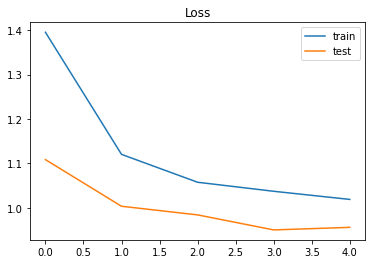

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save("lstmmodel.h5")

In [ ]:
p = model.predict(final_word_x_wv_numeric_test)

In [ ]:
predict = np.argmax(p, axis=1)
predict

array([6, 5, 5, ..., 6, 5, 2])

**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(final_x_wv,y.astype("int"))
print("testing")

testing


In [ ]:
p = clf.predict(final_x_wv_test)

In [ ]:
data_test["label"] = p

------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>SVM on Word2vec</h2>

In [ ]:
clf = SVM()
clf.fit(final_x_wv,y.astype("int"))
print("testing")

testing


In [ ]:
# Predicting the test data
p = clf.predict(final_x_wv_test)

In [ ]:
# adding the results to the test datafram
data_test["label"] = p

In [ ]:
#create a dataframe for dimensions test
df_wv_test = pd.DataFrame(X_tsne_wv_test, columns=['x', 'y'])
df_wv_test["label"] = data_test["label"]
df_wv_test

,x,y,label
0,7.586317,61.364948,3
1,-3.232638,12.709859,5
2,34.303860,45.386814,5
3,-80.811821,-12.550409,9
4,10.935827,51.733486,3
...,...,...,...
9995,-94.637459,-7.013300,9
9996,-92.166145,-4.858034,9
9997,36.751457,-10.448875,4
9998,1.598460,31.675255,5


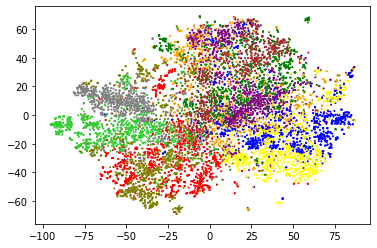

In [ ]:
# ploting the predicted data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green','blue','purple','yellow','brown','orange','grey','olive', 'limegreen']
ax.scatter(df_wv_test['x'], df_wv_test['y'], s=1, c=df_wv_test["label"], cmap=matplotlib.colors.ListedColormap(colors))

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>Gaussian Naive bayes</h2>

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(final_x_wv,y_train.astype("int"))

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(final_x_wv_test)

In [ ]:
data_test["label"] = p

----------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2> fasttext </h2>

In [ ]:
 # import fast text
 
 import fasttext as ft
 import fasttext.util

In [ ]:
# downloading farsi vectors
fasttext.util.download_model( 'fa', if_exists='ignore') 

'cc.fa.300.bin'

In [ ]:
# change data to the proper style for training from fasttext

data.iloc[:, 2] = data.iloc[:, 2].apply(lambda x: '__label__' + str(x))
data

,app_id,description_fa,label
0,0,باز مین روب برنامه فکر مین موجود صفحه باز کشف ...,__label__1
1,1,دراین باز تعداد عکس ن خاطر سپرده بعدا جواب پرس...,__label__1
2,2,تلا نافرجا درک بوفالو مرگ پا ماجرا نیستچرا آنج...,__label__7
3,3,فیل نما برنام دانلود آنلاین فیل سریال نمایش فی...,__label__7
4,4,برنامه حاو ۵۰۰ عکس ژس مدل عکاس شدنه کتاب مدل ع...,__label__7
...,...,...,...
37894,37894,هزین هفته مسابقه هرگونه اب سوال مشکل کانال تلگ...,__label__1
37895,37895,حیو مزرعه کمک احتیاج بلوک نج ببرید جذاب سنین ک...,__label__1
37896,37896,دوس دار عکس پروفایل باشه حتما برنامه نصب کن یه...,__label__7
37897,37897,نسخه باز باز معما صد لوگو باشگاه جه بینید حدس ...,__label__1


In [ ]:
# save data to a text file for predicting and training

data[['label', 'description_fa']].to_csv('train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None,  
                                )

In [ ]:
data_test['label'] = p
data_test

,app_id,description_fa,label
0,40000,برنامه باز جالب میکرو آماده جنگ بالون جنگ بالو...,
1,40001,باز آموز میلونر زب انگلیس تقو زب انگیلیس سنین ...,
2,40002,موضوع کن شاد سرگر حدس موضوع سبک گرافیک موسیق ا...,
3,40003,نر افزار فول تلگرا تلگرا امک بهتون ده نر افزار...,
4,40004,کن سریع هس تون خودتو امتح کن ساده جذاب سریع ما...,
...,...,...,...
9995,49995,فالوورگیر اینستاگرا امک لایک بگیر اینستاگرا کا...,
9996,49996,میخوا نامحدود آنفلو کن دلتون میخواد عکس اینستا...,
9997,49997,باز زیبا کنسول میکرو یاد گذشته براتون بازیه زی...,
9998,49998,دوس اطلاع عمو داشته_با دوس جه اطراف هرچه سریع ...,


In [ ]:
# saving test data to text file 
data_test[['label', 'description_fa']].to_csv('test.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None,  
                                )

In [ ]:
# train fastetxt on train data
model = fasttext.train_supervised('train.txt', wordNgrams=5)

In [ ]:
# predict on test data

for i in range(0, len(data_test["description_fa"])):
 data_test["label"][i] = model.predict(data_test["description_fa"][i])[0][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# write prediction in proper style to pandas dataframe
for i in range(0, len(data_test["description_fa"])):
  n = re.sub("__label__","",data_test["label"][i])
  data_test["label"][i] = int(n)
n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'1'

<h2><b>XGBoost</b><h2>



---



In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_x_wv,y.astype("int"))

In [ ]:
# squueze the data if you hhavn't squze it before
# X_train = np.array(X_train)
# X_train = np.squeeze(X_train, axis=2)
# X_test = np.array(X_test)
# X_test = np.squeeze(X_test, axis=2)

In [ ]:
# create matrix for train and validation
dtrain_ = xgb.DMatrix(X_train,label = y)
dval = xgb.DMatrix(X_test)

In [ ]:
# setting the parameters
different_settings = []

param = {'max_depth': 7, 'eta': 0.2, 'objective': 'multi:softmax'}
param['nthread'] = 4
param['num_class'] = 10
different_settings.append(param)
param_2 = {'max_depth': 7, 'eta': 0.3, 'objective': 'multi:softmax'}
param_2['nthread'] = 4
param_2['num_class'] = 10
different_settings.append(param_2)
param_3 = {'max_depth': 7, 'eta': 0.1, 'objective': 'multi:softmax'}
param_3['nthread'] = 4
param_3['num_class'] = 10
different_settings.append(param_3)

In [ ]:
#using cross validation for choosing between different params
for p in different_settings:
  bst = xgb.XGBClassifier(p)
  cvresult = xgb.cv(p, dtrain_, num_boost_round=bst.get_params()['n_estimators'], nfold=5,
            metrics='mlogloss', early_stopping_rounds=100)
  bst.set_params(n_estimators=cvresult.shape[0])
  bst.fit(dtrain_, dtrain_['Disbursed'], eval_metric='mlogloss')

  dtrain_predictions = bst.predict(dval)
  dtrain_predprob = bst.predict_proba(dval)[:,1]
        
    #Print model report:
  print("\nModel Report")
  print("Accuracy : %.4g" % metrics.accuracy_score(dtrain_['Disbursed'].values, dtrain_predictions))
  print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain_['Disbursed'], dtrain_predprob))
                    
  feat_imp = pd.Series(bst.booster().get_fscore()).sort_values(ascending=False)
  feat_imp.plot(kind='bar', title='Feature Importances')
  plt.ylabel('Feature Importance Score')

In [ ]:
#final train matrix
dtrain = xgb.DMatrix(final_x_wv,label = y)
dtest = xgb.DMatrix(final_x_wv_test)

In [ ]:
# setting the parameters

param = {'max_depth': 8, 'eta': 0.1, 'objective': 'multi:softmax'} 
param['nthread'] = 4
param['num_class'] = 10

In [ ]:
num_round = 350
bst = xgb.train(param, dtrain, num_round)

In [ ]:
predict = bst.predict(dtest)

---------------------------------------------------------

<h2><b> Random Forest</b> </h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=0, verbose = 1)
clf.fit(final_x_wv, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predict = clf.predict(final_x_wv_test)

<h2> Saving the data </h2>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_test["label"] = predict

In [ ]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
data_test.to_csv("prediction_q1_29.csv")

In [ ]:
cd ../..

/content


<h1><b>Conclusion</b></h1>

---


XGboost was the best classifier of all them with 71% accuracy after that svm with 70%. to make it better we can:

1.   Add more data
2.   Treat missing and Outlier values
3.   Feature Engineering.
4.   use Multiple algorithms.
5.   Feature Selection
6.   Algorithm Tuning.



google colab link of this code: https://colab.research.google.com/drive/1PiXQuK6kkWkQOT_MbYXIgGTXC0GDnhtc#scrollTo=AVRZO3mymW1L

----------------------------------------------------